# DS102 Project

Name: ariados5338

Class: 2019

## Problem Statement

Speech or other form of expressions may be deemed hateful or offensive to people with different experience, communities, backgrounds, religious beliefs, or identities.

On 1 Apr 19, Mr K Shanmugam, Minister for Ministry of Home Affairs (MHA), gave a ministerial speech at parliament on restricting hate speech to maintain racial and religious harmony. 

Mr K Shanmugam defined hate speech as, "all forms of expression which spread, incite, promote, or justify racial hatred, xenophobia, or other forms of hatred based on intolerance." 

He also touched on the speech spectrum, where he stated that, "speech is a continuum; a spectrum. There can be acceptable commentary on race and religion. There can be offensive speech. There can be hate speech. Offensive speech can segue into hate speech. And they can overlap." He also stated that it was important to have restrictions on offence speech, because of the potential that offensive speech could insidiously seep into the hate speech continuum, and offensive speech could lead to dehumanisation of the target.

Mr K. Shanmugam broke down two aspects of offensive speech:

1. Speech content (words): derogatory, offensive, and/or insulting to a particular race or religion?
2. The likely impact of the speech: the platform of delivery, occasion, reach?

### Songs with Offensive Lyrics

A document dated for the Apr 1 parliamentary sitting, and among the songs listed were Nine Inch Nails' Heresy, Ariana Grande's God is a Woman, Hozier's Take Me to Church and Lady Gaga's Judas.

1. Ariana Grande - God is a woman: You, you love it how I move you / You love it how I touch you / My one, when all is said and done / You'll believe God is a woman
2. Hozier - Take me to church: Take me to church / I'll worship like a dog at the shrine of your lies / I'll tell you my sins and you can sharpen your knife / Offer me that deathless death / Good God, let me give you my life

<div class="alert alert-info">In this problem, the tasks are (1)  to study the speech content of listed songs with offensive lyrics on the online platform Spotify; and (2) to train and implement a Naïve Bayes model to predict english songs with offensive lyrics.</div>

## Caveats

The dataset selected were list of song deemed with offensive lyics, available on the popular song streaming platform - Spotify. While the playlists were curated by two separate curators, due diligence was done to minimise **sample bias**. The songs were checked against Mr K. Shamugam's examples of songs with offensive lyrics, or artists who were opined by Mr K. Shamugam to have produced songs with offensive lyrics. Furthermore, the limited sample size of the training set limits the performance of the model.

It is important to note that datasets were referenced against Mr K. Shamugam ministerial statement, **prejudice bias** (originating from Mr. K Shamugam and MHA), has already been introduced from the beginning. 

The ministerial statement also did not state what kind of words or wording could be deemed as offensive - *context is all* - thus the song lyrics could not be trimmed to the absolute strings deemed offensive to ensure the right training sets were being fed to the model.

## Exploratory Data Analysis

### Datasets

**Datasets required:**

- `offensive-songs.csv` from [Spotify Playlist](https://open.spotify.com/user/11170720751/playlist/2sd5TzBIPVPnReUzqFcwWu?si=kdBO_ExYSn6uzehZkQj2mA) and [Spotify Playlist](https://open.spotify.com/user/1226516746/playlist/0GSuwwrCcFkCiu8b44VzIV?si=3Xyi-v_PSACWhNlmk5R1yQ)

### Import Libraries

In [0]:
import re
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import collections

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

import profanity_check
from profanity_check import predict, predict_prob

pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(threshold=np.nan)
sns.set()
%matplotlib inline
DIMS=(16, 6)

In [0]:
# Read csv into df_offensive
df_offensive = pd.read_csv('offensive-songs.csv')
df_offensive.sample(3)

lyrics_series = df_offensive['lyrics']
lyrics_series.sample(1).iloc[0]

"Look inside Look inside your tiny mind Now look a bit harder 'Cause we're so uninspired So sick and tired of all the hatred you harbour So you say It's not okay to be gay Well, I think you're just evil You're just some racist who can't tie my laces Your point of view is medieval Fuck you (fuck you) Fuck you very, very much 'Cause we hate what you do And we hate your whole crew So, please don't stay in touch Fuck you (fuck you) Fuck you very, very much 'Cause your words don't translate And it's getting quite late So, please don't stay in touch Do you get Do you get a little kick out of being small-minded? You want to be like your father It's approval you're after Well, that's not how you find it Do you Do you really enjoy living a life that's so hateful? 'Cause there's a hole where your soul should be You're losing control a bit And it's really distasteful Fuck you (fuck you) Fuck you very, very much 'Cause we hate what you do And we hate your whole crew So, please don't stay in touch 

In [0]:
# Concatenate all lyrics into a string
lyrics_list = lyrics_series.tolist()
lyrics_list[0:5]

["He sewed his eyes shut because he is afraid to see He tries to tell me what I put inside of me He's got the answers to ease my curiosity He dreamed a god up and called it Christianity Your god is dead and no one cares If there is a hell I'll see you there He flexed his muscles to keep his flock of sheep in line He made a virus that would kill off all the swine His perfect kingdom of killing, suffering and pain Demands devotion atrocities done in his name Your god is dead and no one cares If there is a hell I'll see you there Your god is dead and no one cares If there is a hell I'll see you there Drowning in his own hypocrisy And if there is a hell I'll see you there Burning with your god in humility Will you die for this?",
 "You, you love it how I move you You love it how I touch you My one, when all is said and done You'll believe God is a woman And I, I feel it after midnight A feeling that you can't fight My one, it lingers when we're done You'll believe God is a woman I don't wa

In [0]:
# Remove special characters from offensive lyrics, convert all words to lower case
lyrics_step1 = []
for d in lyrics_list:
    d = re.sub('[-_,$&!.;%]?()|\""', '', d) 
    d = d.strip().lower()   
    lyrics_step1.append(d)
print(lyrics_step1[0:3])

["he sewed his eyes shut because he is afraid to see he tries to tell me what i put inside of me he's got the answers to ease my curiosity he dreamed a god up and called it christianity your god is dead and no one cares if there is a hell i'll see you there he flexed his muscles to keep his flock of sheep in line he made a virus that would kill off all the swine his perfect kingdom of killing suffering and pain demands devotion atrocities done in his name your god is dead and no one cares if there is a hell i'll see you there your god is dead and no one cares if there is a hell i'll see you there drowning in his own hypocrisy and if there is a hell i'll see you there burning with your god in humility will you die for this?", "you you love it how i move you you love it how i touch you my one when all is said and done you'll believe god is a woman and i i feel it after midnight a feeling that you can't fight my one it lingers when we're done you'll believe god is a woman i don't wanna wa

In [0]:
# Remove stop words
lyrics_step2 = []
for lyrics in lyrics_step1:
    if lyrics not in stopwords.words('english'):
        lyrics_step2.append(lyrics)
print(lyrics_step2)

["he sewed his eyes shut because he is afraid to see he tries to tell me what i put inside of me he's got the answers to ease my curiosity he dreamed a god up and called it christianity your god is dead and no one cares if there is a hell i'll see you there he flexed his muscles to keep his flock of sheep in line he made a virus that would kill off all the swine his perfect kingdom of killing suffering and pain demands devotion atrocities done in his name your god is dead and no one cares if there is a hell i'll see you there your god is dead and no one cares if there is a hell i'll see you there drowning in his own hypocrisy and if there is a hell i'll see you there burning with your god in humility will you die for this?", "you you love it how i move you you love it how i touch you my one when all is said and done you'll believe god is a woman and i i feel it after midnight a feeling that you can't fight my one it lingers when we're done you'll believe god is a woman i don't wanna wa

In [0]:
# Join all the descriptions to get a long string using a for loop
long_str_lyrics = ''
for lyrics in lyrics_step2:
    long_str_lyrics += '' + lyrics
print(long_str_lyrics)

he sewed his eyes shut because he is afraid to see he tries to tell me what i put inside of me he's got the answers to ease my curiosity he dreamed a god up and called it christianity your god is dead and no one cares if there is a hell i'll see you there he flexed his muscles to keep his flock of sheep in line he made a virus that would kill off all the swine his perfect kingdom of killing suffering and pain demands devotion atrocities done in his name your god is dead and no one cares if there is a hell i'll see you there your god is dead and no one cares if there is a hell i'll see you there drowning in his own hypocrisy and if there is a hell i'll see you there burning with your god in humility will you die for this?you you love it how i move you you love it how i touch you my one when all is said and done you'll believe god is a woman and i i feel it after midnight a feeling that you can't fight my one it lingers when we're done you'll believe god is a woman i don't wanna waste no

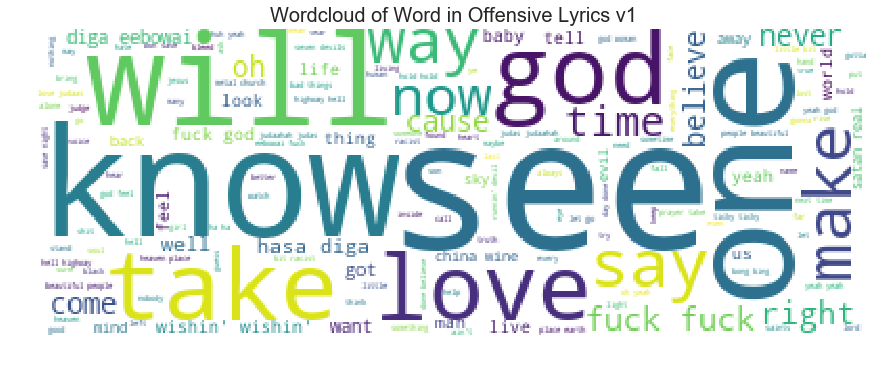

In [0]:
# Plot the wordcloud
plt.figure(figsize=(15,8))
lyrics_wordcloud = WordCloud(
    width=400, height=150,
    background_color="white", 
    max_words=150, relative_scaling = 1.0).generate(long_str_lyrics)
plt.imshow(lyrics_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Word in Offensive Lyrics v1", fontsize=20)
plt.show()

In [0]:
# Top 30 most frequent words
allWords = nltk.tokenize.word_tokenize(long_str_lyrics)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
mostCommon= allWordExceptStopDist.most_common(30)
print(mostCommon) #list of paired tuples

[("'s", 242), ("n't", 175), ('?', 141), ("'m", 133), ('god', 131), ('like', 123), ('(', 110), (')', 110), ("'ll", 109), ("'", 101), ("'re", 91), ('yeah', 91), ('fuck', 74), ('take', 71), ('love', 66), ('see', 64), ('know', 57), ('oh', 56), ('got', 54), ('’', 54), ('one', 52), ('time', 52), ('feel', 49), ('let', 48), ('believe', 44), ('ca', 44), ('go', 44), ('way', 43), ('make', 43), ('well', 42)]


In [0]:
# created a list for stop words that are non-racial and non-religious verb, adverb, proposition, conjunction to be added into new stop words list
mostCommon
mostCommon.remove(('god',131))
mostCommon.remove(('fuck', 74))
mostCommon.remove(('love', 66))
mostCommon.remove(('time', 52))
mostCommon.remove(('feel', 49))
mostCommon.remove(('believe', 44))

mostCommon_list = [ x[0] for x in mostCommon]
mostCommon_list

["'s",
 "n't",
 '?',
 "'m",
 'like',
 '(',
 ')',
 "'ll",
 "'",
 "'re",
 'yeah',
 'take',
 'see',
 'know',
 'oh',
 'got',
 '’',
 'one',
 'let',
 'ca',
 'go',
 'way',
 'make',
 'well']

In [0]:
# Append mostCommon list into stop words
new_stopwords = nltk.corpus.stopwords.words('english')
new_stopwords.extend(mostCommon_list)
print(new_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
# Remove new stopwords list again
lyrics_step3 = []
for lyrics in lyrics_step2:
    tokenized_lyrics = nltk.tokenize.word_tokenize(lyrics)
    song_lyrics = []
    
    for word in tokenized_lyrics:
        if word not in new_stopwords:
            song_lyrics.append(word)
    lyrics_step3.append(song_lyrics)
    
print(lyrics_step3)

[['sewed', 'eyes', 'shut', 'afraid', 'tries', 'tell', 'put', 'inside', 'answers', 'ease', 'curiosity', 'dreamed', 'god', 'called', 'christianity', 'god', 'dead', 'cares', 'hell', 'flexed', 'muscles', 'keep', 'flock', 'sheep', 'line', 'made', 'virus', 'would', 'kill', 'swine', 'perfect', 'kingdom', 'killing', 'suffering', 'pain', 'demands', 'devotion', 'atrocities', 'done', 'name', 'god', 'dead', 'cares', 'hell', 'god', 'dead', 'cares', 'hell', 'drowning', 'hypocrisy', 'hell', 'burning', 'god', 'humility', 'die'], ['love', 'move', 'love', 'touch', 'said', 'done', 'believe', 'god', 'woman', 'feel', 'midnight', 'feeling', 'fight', 'lingers', 'done', 'believe', 'god', 'woman', 'wan', 'na', 'waste', 'time', 'ai', 'onetrack', 'mind', 'tell', 'want', 'ai', 'nobody', 'else', 'relate', 'boy', 'ai', 'afraid', 'baby', 'lay', 'pray', 'tellin', 'want', 'things', 'told', 'try', 'come', 'keep', 'flourishing', 'universe', 'company', 'love', 'move', 'love', 'touch', 'said', 'done', 'believe', 'god', 'w

In [0]:
# Join all the descriptions to get a long string using a for loop
# long_str_lyrics2 = ''
# for lyrics in lyrics_step3:
#     long_str_lyrics2 += '' + lyrics
# print(long_str_lyrics2)

long_str_lyrics2 = ' '.join([str(item) for sublist in lyrics_step3 for item in sublist])

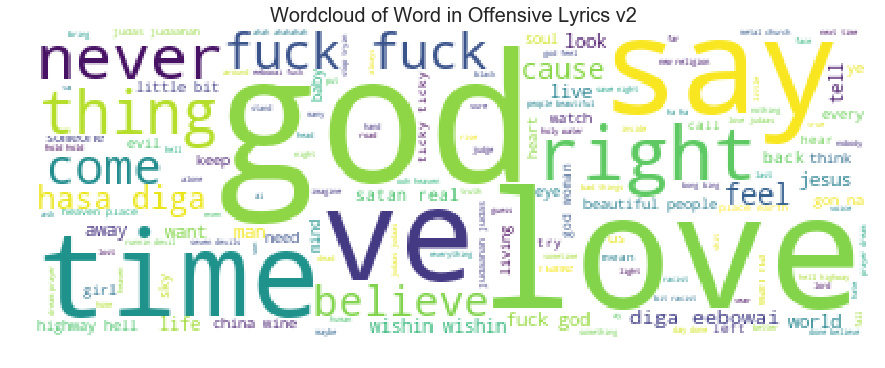

In [0]:
# Plot the wordcloud version 2
plt.figure(figsize=(15,8))
lyrics_wordcloud = WordCloud(
    width=400, height=150,
    background_color="white", 
    max_words=150, relative_scaling = 1.0).generate(long_str_lyrics2)
plt.imshow(lyrics_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Word in Offensive Lyrics v2", fontsize=20)
plt.show()

### Something Amusing...

If you read the bigger words in the Wordcloud from right to left, top to bottom, the Wordcloud v2 reads

*NEVER FUCK FUCK GOD SAY RIGHT TIME HAVE LOVE*

## Predicting Songs with Offensive Lyrics using Naïve Bayes Model

### Dataset

**Datasets required:**

- `singapore-songs-offensive-or-not.csv` from [Spotify Playlist](https://open.spotify.com/user/11170720751/playlist/2sd5TzBIPVPnReUzqFcwWu?si=kdBO_ExYSn6uzehZkQj2mA) and [Spotify Playlist](https://open.spotify.com/user/1226516746/playlist/0GSuwwrCcFkCiu8b44VzIV?si=3Xyi-v_PSACWhNlmk5R1yQ) and [Spotify Playlist](https://open.spotify.com/user/spotifycharts/playlist/37i9dQZEVXbK4gjvS1FjPY?si=wJjpIjplTYK4j1lmqe9g5Q)

### Train the Model

In [0]:
# offensive_songs.csv 0-49 as training set
df_songs = pd.read_csv('singapore-songs-offensive-or-not.csv')
df_songs

,name,artist,lyrics,offensive
0,Bad Guy,Billie Eilish,"White shirt, now red my bloody nose Sleeping, ...",0
1,Heresy,Nine Inch Nails,He sewed his eyes shut because he is afraid to...,1
2,God is a woman,Ariana Grande,"You, you love it how I move you You love it ho...",1
3,Sucker,Jonas Brothers,"We go together Better than birds of a feather,...",0
4,Take Me to Church,Hozier,My lover's got humour She's the giggle at a fu...,1
5,Judas,Lady Gaga,Whoa-whoa-whoa-whoa-whoa I'm in love with Juda...,1
6,They Don't Know Me,Josefine,"Usually I know better, Better than this I don'...",0
7,Heaven is a Place on Earth,Belinda Carlisle,"Ooh, baby, do you know what that's worth? Ooh ...",1
8,Hasa Diga Eebowai,Michael Potts,"In this part of Africa, we ALL have a saying ?...",1
9,7 Rings,Ariana Grande,"Yeah, breakfast at Tiffany's and bottles of bu...",0


### Train the Model

In [0]:
# offensive_songs.csv 50-64 as test set

#
X = df_songs['lyrics']
y = df_songs['offensive']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

print(X_train.count())
print(y_train.count())
print(X_test.count())
print(y_test.count())

count_vect = CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'))
count_vect.fit(X_train)

X_train_vectorized = count_vect.transform(X_train)
print(X_train_vectorized.A.shape)

clf = MultinomialNB().fit(X_train_vectorized, y_train)

73
73
25
25
(73, 2386)


### Test the Model

In [0]:
X_test_vectorized = count_vect.transform(X_test)
y_predict = clf.predict(X_test_vectorized)
y_confusion_df = pd.DataFrame({'y_predict':y_predict,
                              'y_test':y_test})
y_confusion_df

,y_predict,y_test
26,0,0
85,1,1
2,1,1
55,1,1
68,0,0
82,1,1
16,0,1
78,1,1
54,0,0
66,1,1


### Evaluate the Offensive-Lyrics-Check Model: Confusion Matrix

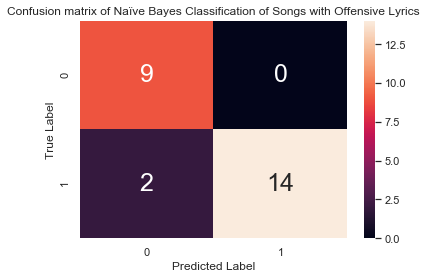

In [0]:
offensive_cm = confusion_matrix(y_test, y_predict)
offensive_cm

# 0 / 1 ====== True Negative / False Positive
# 9,0
# 1 / 0 ====== False negative / True Positive
# 2,14

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(offensive_cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of Naïve Bayes Classification of Songs with Offensive Lyrics")
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
plt.show()

### Test [Profanity-Check](https://pypi.org/project/profanity-check/#description) against Test Set

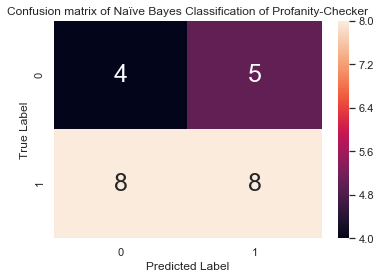

In [0]:
offensive_cm_profanity = confusion_matrix(y_test, profanity_checker_predict)
offensive_cm_profanity

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(offensive_cm_profanity, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of Naïve Bayes Classification of Profanity-Checker")
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
plt.show()

### Comparing Performance of Offensive-Lyrics-Check

In [0]:
profanity_checker_predict=predict(X_test)

comparison_df = pd.DataFrame({'Offensive-Lyrics-Check':y_predict,
                              'Profanity-Check':profanity_checker_predict})
comparison_df

,Offensive-Lyrics-Check,Profanity-Check
0,0,0
1,1,0
2,1,1
3,1,0
4,0,1
5,1,1
6,0,1
7,1,0
8,0,1
9,1,0


In [0]:
# Detection Accuracy of Profanity-Checker
detection_accuracy_profanity_checker = (offensive_cm_profanity[0][0] + offensive_cm_profanity[1][1])/sum(sum(offensive_cm_profanity))
# Detection Accuracy of Offensive-Lyrics-Check Model
detection_accuracy_offensive_lyrics_check_model = (offensive_cm[0][0] + offensive_cm[1][1])/sum(sum(offensive_cm))
print(detection_accuracy_offensive_lyrics_check_model)
print(detection_accuracy_profanity_checker)

0.92
0.48


## Conclusion

Exploratory data analytics of the songs with offensive lyrics was limited to macro-analysis of the most frequent words used in the set of offensive lyrics. Deep dives could be done if more metadata of each song was collected, to study the **reach / engagement rate** of each song, as per the the criteria set out by Mr K. Shamugam.

The model was trained with rather few samples for a difficult problem. In this project, obtaining the right training set samples and quick retraining was was important, as the style and content of the offensive speech and offensive lyrics coud change rapidly in the wake of a specific terror event, or a specific non-political movement that opposes mainstram racial and religious beliefs, or even a religious movement. Thus, if the iteration of training and retraining is not quick, the model loses its efficiency. Building a **context-aware** model would be challenging.

**Credits:**
1. Definition of hate speech and offensive speech: [K. Shanmugam ministrial speech on 1 Apr 19](https://www.mha.gov.sg/newsroom/in-parliament/parliamentary-speeches/news/ministerial-statement-on-restricting-hate-speech-to-maintain-racial-and-religious-harmony-in-singapore-speech-by-mr-k-shanmugam-minister-for-home-affairs-and-minister-for-law)
2. Datasets: [Spotify Playlist](https://open.spotify.com/user/11170720751/playlist/2sd5TzBIPVPnReUzqFcwWu?si=kdBO_ExYSn6uzehZkQj2mA), [Spotify Playlist](https://open.spotify.com/user/1226516746/playlist/0GSuwwrCcFkCiu8b44VzIV?si=3Xyi-v_PSACWhNlmk5R1yQ), [Spotify Playlist](https://open.spotify.com/user/spotifycharts/playlist/37i9dQZEVXbK4gjvS1FjPY?si=wJjpIjplTYK4j1lmqe9g5Q) and [Genius](http://genius.com). Access the data [here](https://1drv.ms/f/s!ApUZq_-VRc3oh2z-TuGt6yUgHLkw)
3. Profanity Check: [Profanity Check](https://pypi.org/project/profanity-check/#description)